In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import tree

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import precision_score,recall_score,f1_score
from imblearn.over_sampling import SMOTE

In [4]:
df = pd.read_csv('s41598-020-73558-3_sepsis_survival_primary_cohort.csv')

In [5]:
df.head

<bound method NDFrame.head of         age_years  sex_0male_1female  episode_number  \
0              21                  1               1   
1              20                  1               1   
2              21                  1               1   
3              77                  0               1   
4              72                  0               1   
...           ...                ...             ...   
110199          0                  0               1   
110200          0                  1               1   
110201         70                  1               1   
110202          0                  0               1   
110203          0                  0               1   

        hospital_outcome_1alive_0dead  
0                                   1  
1                                   1  
2                                   1  
3                                   1  
4                                   1  
...                               ...  
110199           

In [6]:
plt.rcParams.update({'font.size':16})

array([[<AxesSubplot:title={'center':'age_years'}>,
        <AxesSubplot:title={'center':'sex_0male_1female'}>],
       [<AxesSubplot:title={'center':'episode_number'}>,
        <AxesSubplot:title={'center':'hospital_outcome_1alive_0dead'}>]],
      dtype=object)

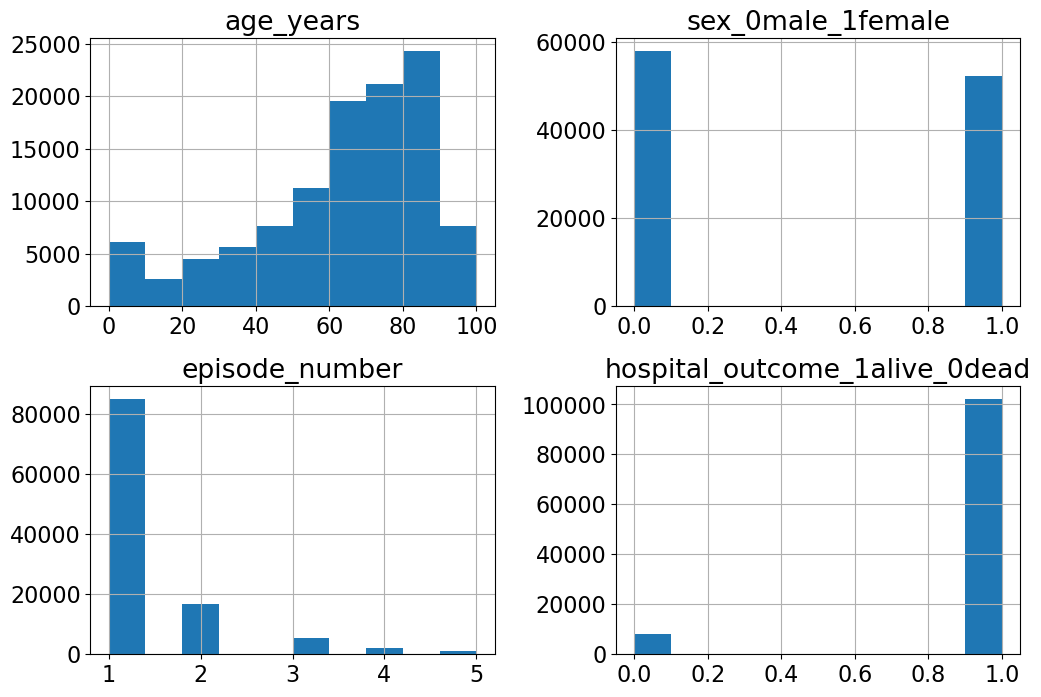

In [7]:
df.hist(figsize=(12,8))

Text(0.5, 1.0, 'Alive and Dead balanced')

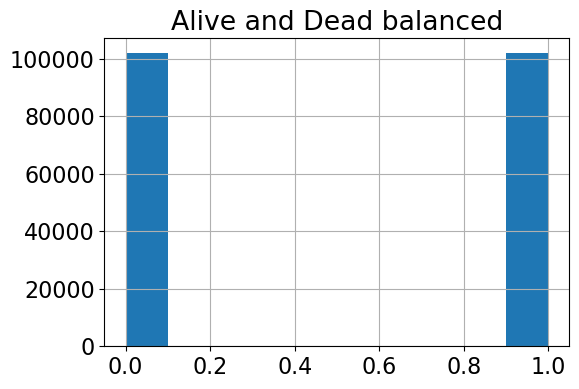

In [8]:
X_var_names = df.columns[:3]
y_var_names = df.columns[3]
X = df[X_var_names]
y = df[y_var_names]
X_resampled,y_resampled = SMOTE().fit_resample(X,y)
y_resampled.hist(figsize=(6,4))
plt.title('Alive and Dead balanced')

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=0)

In [10]:
clf = tree.DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_train,y_train)

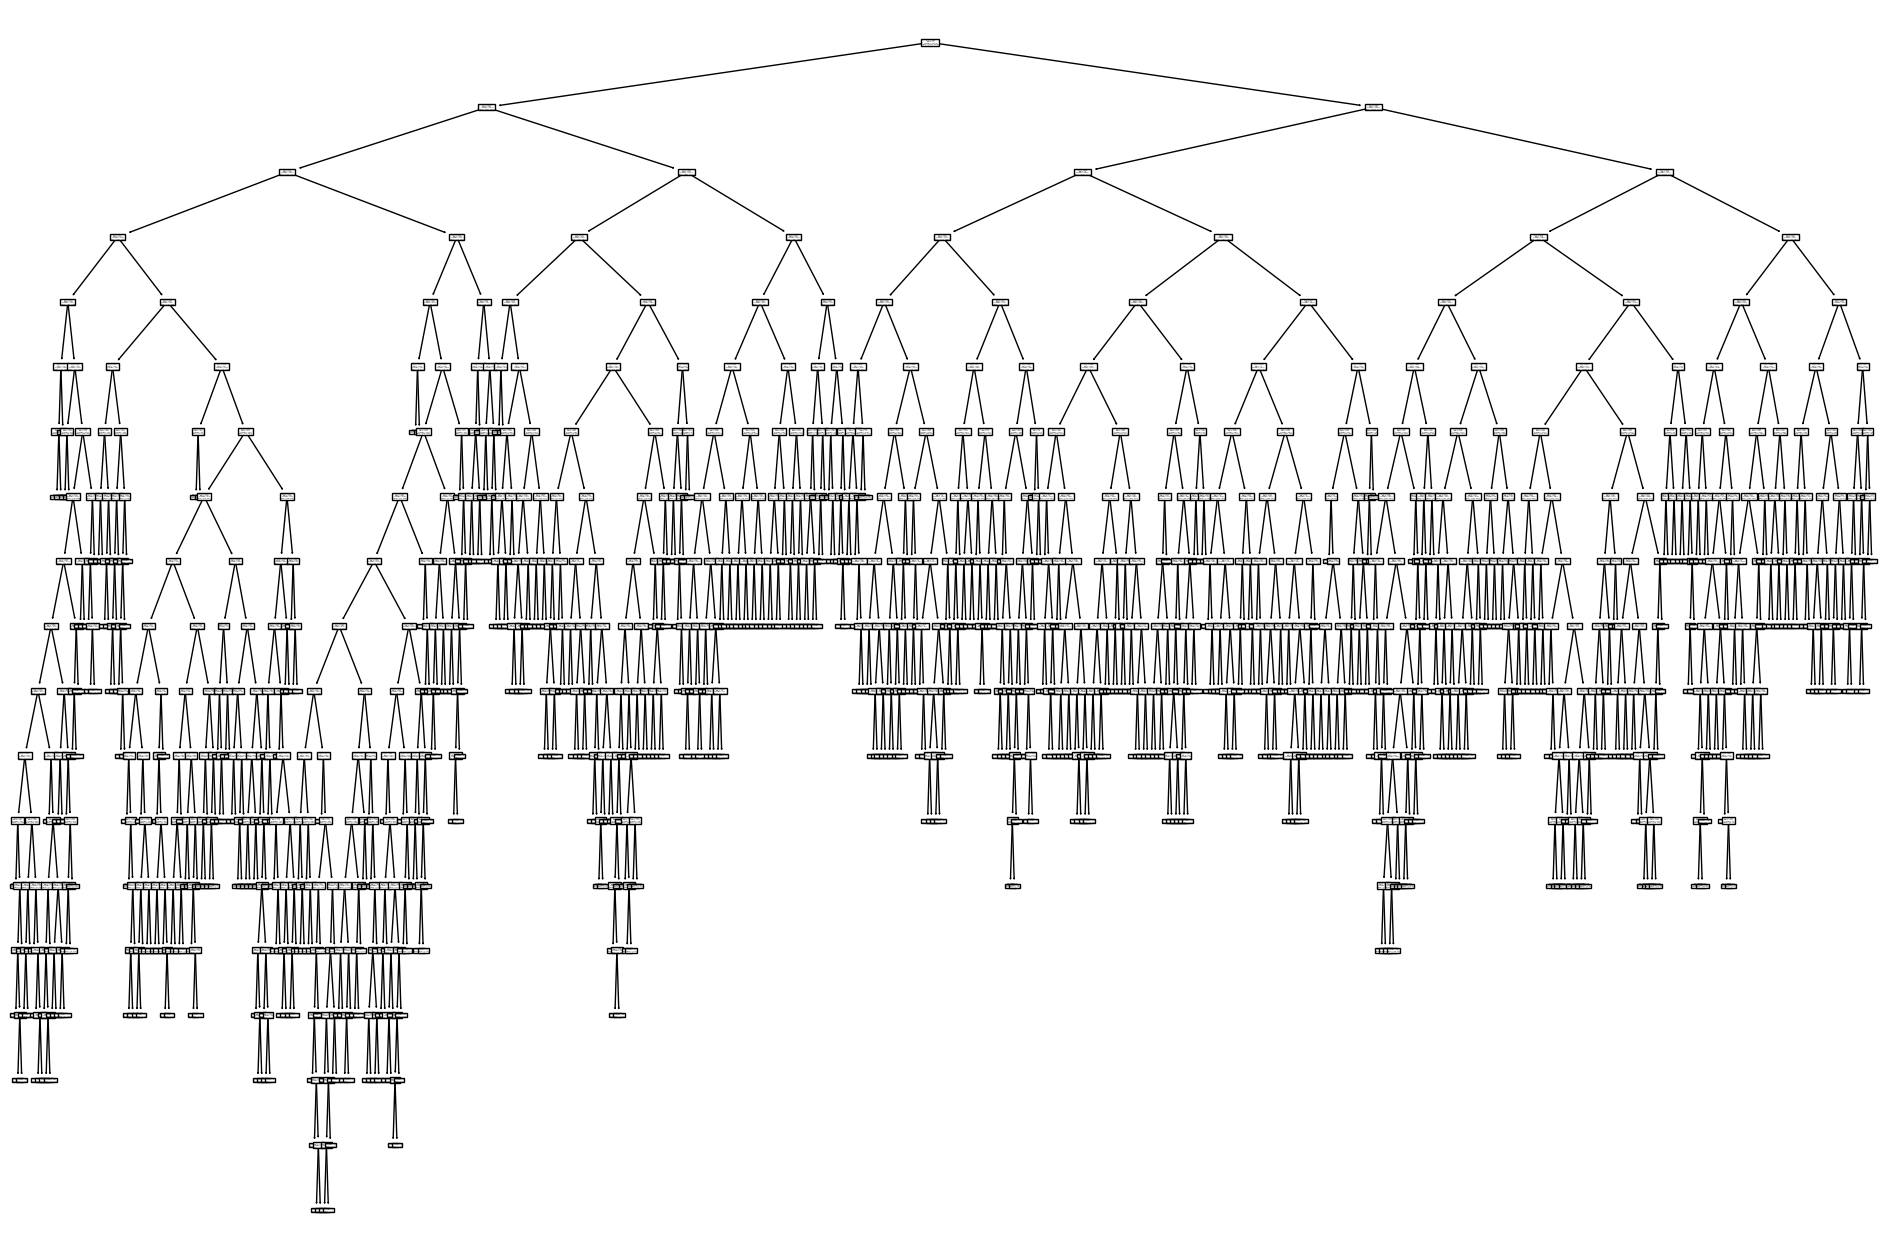

In [11]:
plt.figure(figsize=(24,16))
tree.plot_tree(clf)
plt.savefig('Training_tree.png',facecolor='white',bbox_inches='tight')
plt.show()

In [12]:
def evaluateModel(clf,X,y):
    y_pred = clf.predict(X)
    cm = confusion_matrix(y,y_pred)
    cm_disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels=['dead','alive'])
    cm_disp.plot()
    print("Precision="+str(np.round(precision_score(y,y_pred),3)))
    print("Recall="+str(np.round(recall_score(y,y_pred),3)))
    print("F1-Score="+str(np.round(f1_score(y,y_pred),3)))
    

Precision=0.968
Recall=0.544
F1-Score=0.696


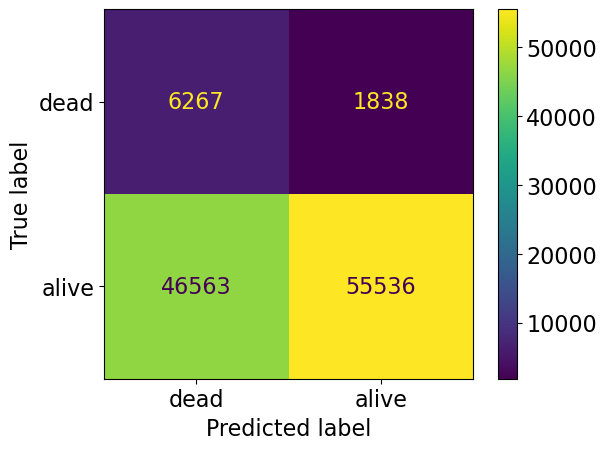

In [13]:
evaluateModel(clf,X,y)

In [14]:
clf_tuned = tree.DecisionTreeClassifier(random_state=0,max_depth=3)
clf_tuned = clf_tuned.fit(X_train,y_train)

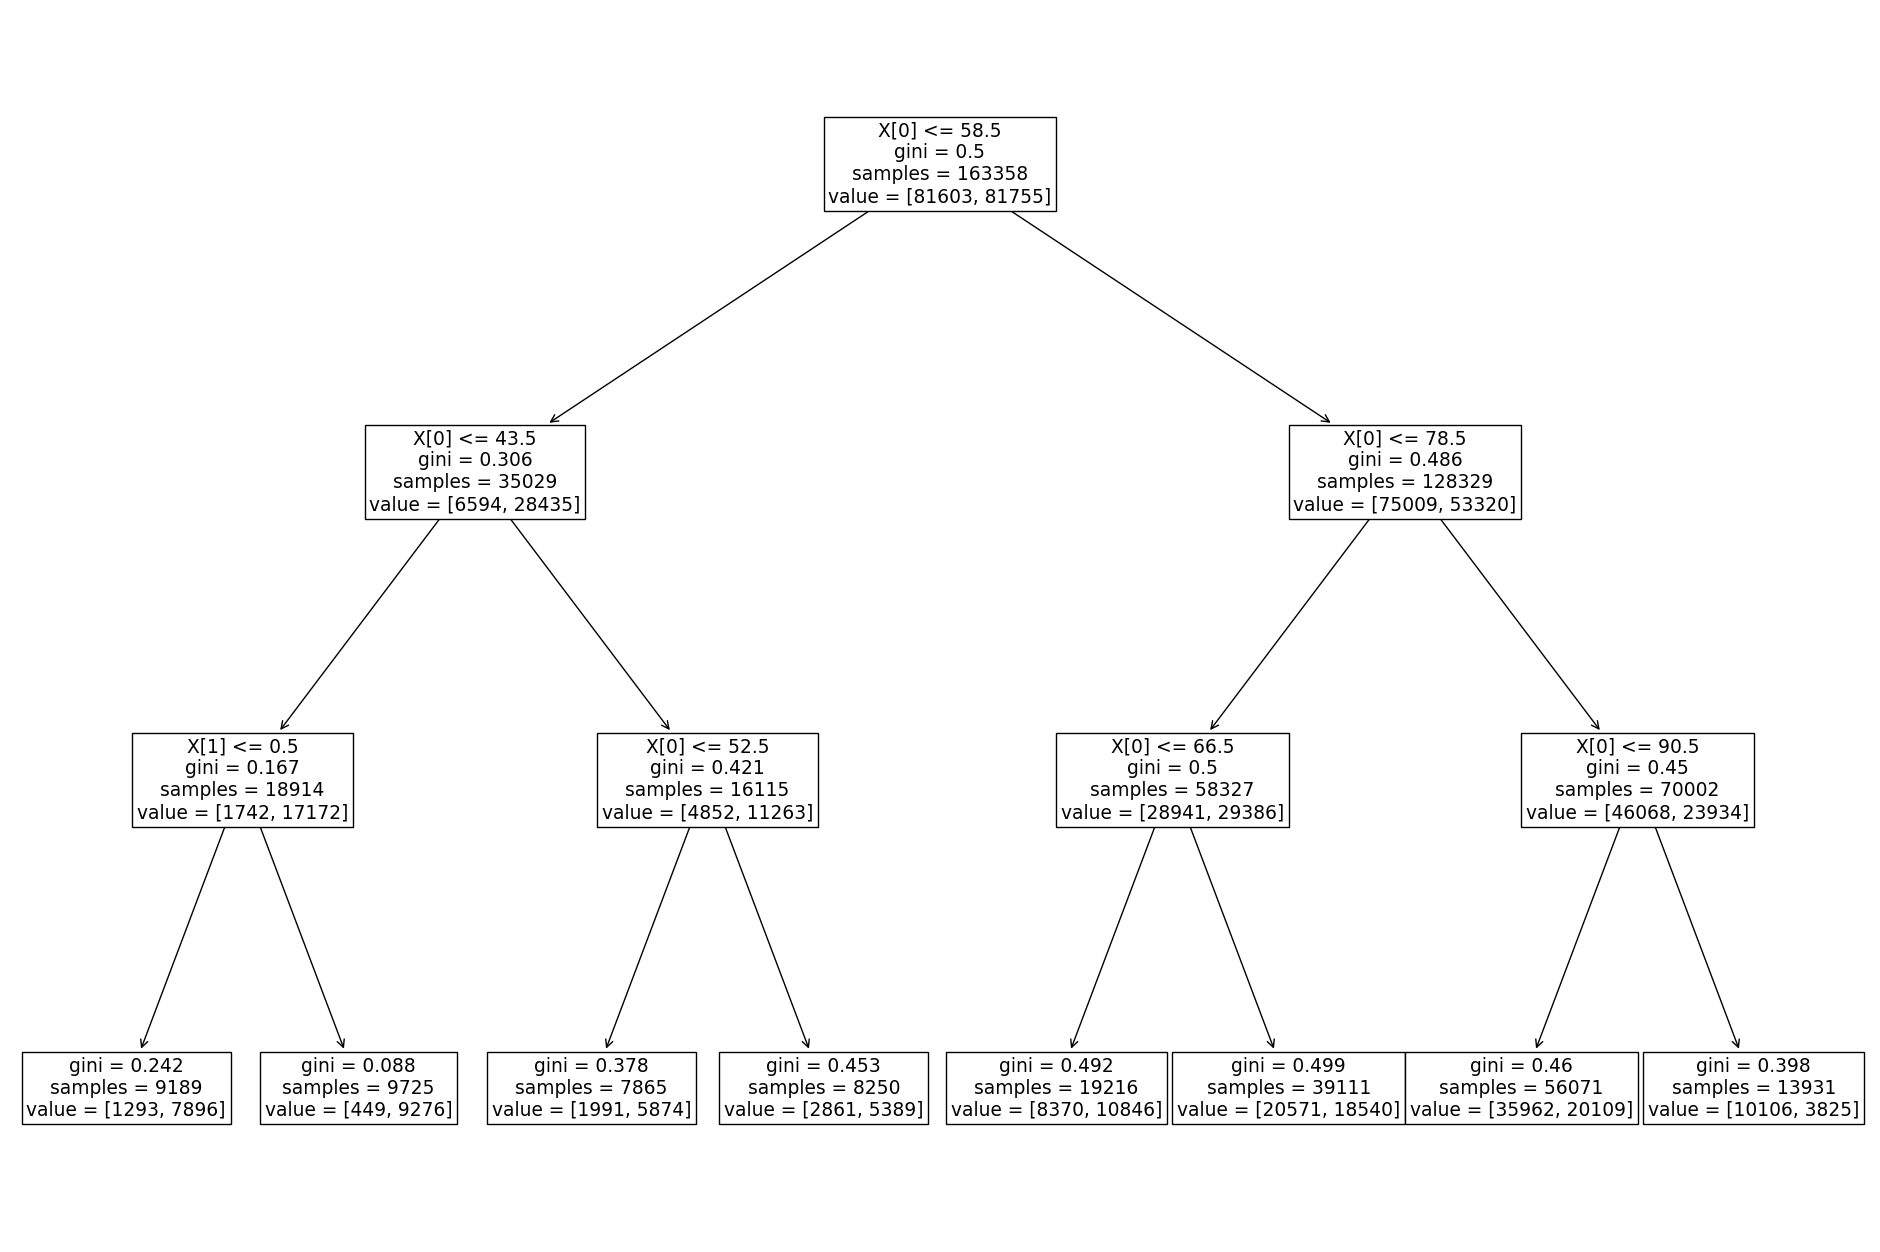

In [15]:
plt.figure(figsize=(24,16))
tree.plot_tree(clf_tuned)
plt.savefig('Tuned Decision Tree.png',facecolor='white',bbox_inches='tight')
plt.show()

Precision=0.971
Recall=0.481
F1-Score=0.643


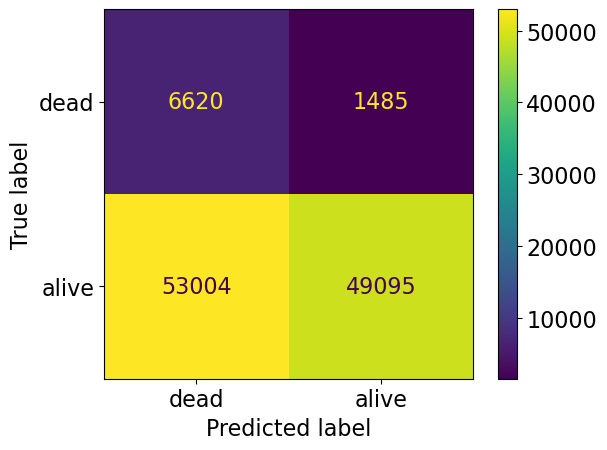

In [16]:
evaluateModel(clf_tuned,X,y)